# G2M insight for Cab Investment firm

Importing libaries and data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import plotly.express as px
import plotly.io as pio
%matplotlib inline 
import webbrowser
from matplotlib import rcParams
from scipy.stats import ttest_1samp

In [3]:
cabData= pd.read_csv('Cab_Data.csv')
CustomersID= pd.read_csv('Customer_ID.csv')
City= pd.read_csv('City.csv')
Transaction_ID= pd.read_csv('Transaction_ID.csv')

## Merging the 4 CSV Files into one master file

In [4]:
firstMerge = pd.merge(cabData, City, on="City")
firstMerge.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [5]:
secondMerge = pd.merge(Transaction_ID, CustomersID, on="Customer ID")
secondMerge.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [6]:
Data = pd.merge(firstMerge, secondMerge, on="Transaction ID")
Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536


In [7]:
print("The minimum date in the dataset " + min(Data['Date of Travel']))
print("The maximum date in the dataset " + max(Data['Date of Travel']))

The minimum date in the dataset 01/01/2017
The maximum date in the dataset 31/12/2018


The date of travel was edited using Excel before importing it here. However, the min and max function was showing incorrect results so I've converted the column to DateTime

In [8]:
Data['Date of Travel'] = pd.to_datetime(Data['Date of Travel'])

In [9]:
min(Data['Date of Travel'])

Timestamp('2016-01-02 00:00:00')

In [10]:
max(Data['Date of Travel'])

Timestamp('2018-12-31 00:00:00')

I'll saperate the years, months and days into their own columns to help me with analysis

In [11]:
Data['Day'] = Data['Date of Travel'].dt.day
Data['Month'] = Data['Date of Travel'].dt.month
Data['Year'] = Data['Date of Travel'].dt.year
Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813,1,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237,1,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242,1,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327,1,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536,1,3,2016


## Adding a profit column to the dataset

In [12]:
Data['Profit'] = Data['Price Charged'] - Data['Cost of Trip']
Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year,Profit
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813,1,8,2016,57.315
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237,1,6,2016,23.666
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242,1,2,2016,27.568
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327,1,7,2016,25.798
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536,1,3,2016,16.844


Rearrenging columns so it would make more sense

In [13]:
changed_column = Data.pop('Profit')
Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813,1,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237,1,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242,1,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327,1,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536,1,3,2016


In [14]:
Data.insert(7, 'Profit', changed_column)
Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,"814,885","24,701",29290,Card,Male,28,10813,1,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,"814,885","24,701",27703,Card,Male,27,9237,1,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,"814,885","24,701",28712,Cash,Male,53,11242,1,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,"814,885","24,701",28020,Cash,Male,23,23327,1,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,"814,885","24,701",27182,Card,Male,33,8536,1,3,2016


In [15]:
change_column = Data.pop('Customer ID')
Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,"814,885","24,701",Card,Male,28,10813,1,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,"814,885","24,701",Card,Male,27,9237,1,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,"814,885","24,701",Cash,Male,53,11242,1,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,"814,885","24,701",Cash,Male,23,23327,1,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,"814,885","24,701",Card,Male,33,8536,1,3,2016


In [16]:
Data.insert(1, 'Customer ID', change_column)
Data.head()

,Transaction ID,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,29290,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,"814,885","24,701",Card,Male,28,10813,1,8,2016
1,10000012,27703,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,"814,885","24,701",Card,Male,27,9237,1,6,2016
2,10000013,28712,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,"814,885","24,701",Cash,Male,53,11242,1,2,2016
3,10000014,28020,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,"814,885","24,701",Cash,Male,23,23327,1,7,2016
4,10000015,27182,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,"814,885","24,701",Card,Male,33,8536,1,3,2016


In [17]:
Data.dtypes

Transaction ID                 int64
Customer ID                    int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Profit                       float64
Population                    object
Users                         object
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Day                            int64
Month                          int64
Year                           int64
dtype: object

The Population & users type is incorrect type

In [18]:
Data['Population'] = [x.replace(',','') for x in Data['Population']]
Data['Population'] = Data['Population'].astype(float)
Data['Users'] = [x.replace(',','') for x in Data['Users']]
Data['Users'] = Data['Users'].astype(float)

Data.dtypes

Transaction ID                 int64
Customer ID                    int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Profit                       float64
Population                   float64
Users                        float64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Day                            int64
Month                          int64
Year                           int64
dtype: object

In [19]:
Data

,Transaction ID,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,29290,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,814885.0,24701.0,Card,Male,28,10813,1,8,2016
1,10000012,27703,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,814885.0,24701.0,Card,Male,27,9237,1,6,2016
2,10000013,28712,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,814885.0,24701.0,Cash,Male,53,11242,1,2,2016
3,10000014,28020,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,814885.0,24701.0,Cash,Male,23,23327,1,7,2016
4,10000015,27182,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,814885.0,24701.0,Card,Male,33,8536,1,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,Cash,Male,24,15651,1,8,2018
359388,10440104,53286,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,Cash,Male,32,6528,1,4,2018
359389,10440105,52265,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,Cash,Male,56,7966,1,5,2018
359390,10440106,52175,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,Card,Male,32,6423,1,5,2018


## Now that the full dataset is good to go, i'll separate it into two dataframes for each company 

In [20]:
YellowCabDF= Data[Data.Company.isin(['Yellow Cab'])]
print(YellowCabDF.shape)
YellowCabDF

(274681, 18)


,Transaction ID,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
6,10000384,27602,2016-02-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076,814885.0,24701.0,Card,Male,23,8542,1,2,2016
7,10000385,27594,2016-09-01,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768,814885.0,24701.0,Cash,Male,28,3901,1,9,2016
8,10000386,27884,2016-03-01,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,814885.0,24701.0,Cash,Male,32,13505,1,3,2016
9,10000387,28533,2016-06-01,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600,814885.0,24701.0,Cash,Male,39,28386,1,6,2016
10,10000388,29039,2016-07-01,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908,814885.0,24701.0,Card,Male,35,17761,1,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,Cash,Male,24,15651,1,8,2018
359388,10440104,53286,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,Cash,Male,32,6528,1,4,2018
359389,10440105,52265,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,Cash,Male,56,7966,1,5,2018
359390,10440106,52175,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,Card,Male,32,6423,1,5,2018


In [21]:
PinkCabDF= Data[Data.Company.isin(['Pink Cab'])]
print(PinkCabDF.shape)
PinkCabDF

(84711, 18)


,Transaction ID,Customer ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,29290,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,814885.0,24701.0,Card,Male,28,10813,1,8,2016
1,10000012,27703,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,814885.0,24701.0,Card,Male,27,9237,1,6,2016
2,10000013,28712,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,814885.0,24701.0,Cash,Male,53,11242,1,2,2016
3,10000014,28020,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,814885.0,24701.0,Cash,Male,23,23327,1,7,2016
4,10000015,27182,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,814885.0,24701.0,Card,Male,33,8536,1,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359159,10437610,51142,2018-06-01,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,48.590,418859.0,127001.0,Card,Female,40,3122,1,6,2018
359160,10437611,52754,2018-12-31,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,85.344,418859.0,127001.0,Card,Female,29,19676,31,12,2018
359161,10437612,53039,2018-07-01,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,58.390,418859.0,127001.0,Card,Male,37,22765,1,7,2018
359162,10437614,51766,2018-02-01,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,31.560,418859.0,127001.0,Cash,Male,18,12364,1,2,2018


## General Stats about the companies

 Checking for NA values

In [22]:
Data.isnull().sum()

Transaction ID        0
Customer ID           0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
Population            0
Users                 0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Day                   0
Month                 0
Year                  0
dtype: int64

Finding the count, mean, Standard Deviation, min & max and various precentages for data

In [23]:
#Changed the format so it would display the entire number
pd.set_option('float_format', '{:,.2f}'.format)
Data.describe()

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Age,Income (USD/Month),Day,Month,Year
count,"359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00"
mean,"10,220,761.19","19,191.65",22.57,423.44,286.19,137.25,"3,132,198.04","158,365.58",35.34,"15,048.82",15.97,7.16,"2,017.05"
std,"126,805.80","21,012.41",12.23,274.38,157.99,160.31,"3,315,194.39","100,850.05",12.59,"7,969.41",8.50,3.41,0.80
min,"10,000,011.00",1.00,1.90,15.60,19.00,-220.06,"248,968.00","3,643.00",18.00,"2,000.00",1.00,1.00,"2,016.00"
25%,"10,110,809.75","2,705.00",12.00,206.44,151.20,28.01,"671,238.00","80,021.00",25.00,"8,424.00",9.00,4.00,"2,016.00"
50%,"10,221,035.50","7,459.00",22.44,386.36,282.48,81.96,"1,595,037.00","144,132.00",33.00,"14,685.00",16.00,8.00,"2,017.00"
75%,"10,330,937.25","36,078.00",32.96,583.66,413.68,190.03,"8,405,837.00","302,149.00",42.00,"21,035.00",23.00,10.00,"2,018.00"
max,"10,440,107.00","60,000.00",48.00,"2,048.03",691.20,"1,463.97","8,405,837.00","302,149.00",65.00,"35,000.00",31.00,12.00,"2,018.00"


In [24]:
print(Data.shape)

(359392, 18)


# Exploratory Data Analysis

#### Profits for Both Companies, Annually and Monthly

In [25]:
OverAllProfit =Data.groupby('Company').Profit.sum().to_frame('Three Years Profit')
pd.set_option('float_format', '{:,.2f}'.format)
OverAllProfit

,Three Years Profit
Company,
Pink Cab,"5,307,328.32"
Yellow Cab,"44,020,373.17"


<AxesSubplot:xlabel='Company'>

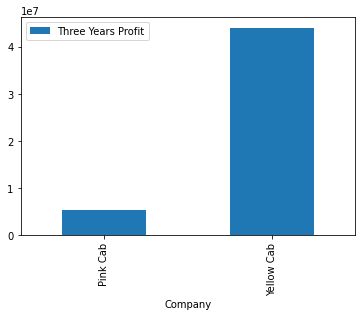

In [26]:
OverAllProfit.plot.bar()

In [27]:
AnnualProfits =Data.groupby(['Company', 'Year']).Profit.sum().to_frame('Annual Profit')
pd.set_option('float_format', '{:,.2f}'.format)
AnnualProfits

Annual Profit
Company    Year               
Pink Cab   2016   1,713,511.22
           2017   2,033,654.91
           2018   1,560,162.19
Yellow Cab 2016  13,926,995.43
           2017  16,575,977.97
           2018  13,517,399.77

<AxesSubplot:xlabel='Company,Year'>

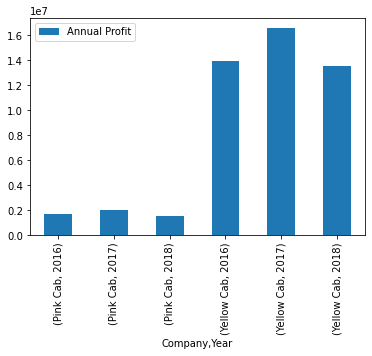

In [28]:
AnnualProfits.plot.bar()

In [29]:
MonthlyProfits =Data.groupby(['Company', 'Month']).Profit.sum().to_frame('Monthly Profit')
pd.set_option('float_format', '{:,.2f}'.format)
MonthlyProfits

Monthly Profit
Company    Month                
Pink Cab   1          299,989.34
           2          315,079.59
           3          414,858.86
           4          271,810.73
           5          305,768.89
           6          335,136.59
           7          364,579.63
           8          451,806.92
           9          507,900.78
           10         674,166.58
           11         567,694.88
           12         798,535.54
Yellow Cab 1        2,963,810.22
           2        3,146,024.02
           3        3,576,954.54
           4        3,212,862.57
           5        4,073,802.65
           6        3,663,100.13
           7        3,411,749.12
           8        3,258,038.18
           9        4,050,505.98
           10       4,309,770.91
           11       3,733,023.69
           12       4,620,731.18

<AxesSubplot:xlabel='Company,Month'>

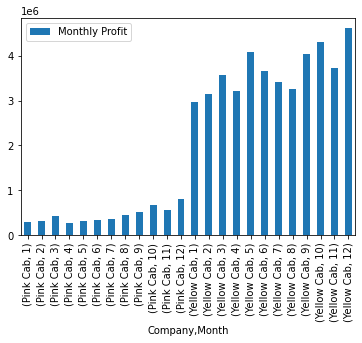

In [30]:
MonthlyProfits.plot.bar()

The Yellow Cab profited approximately 8 times more than the Pink Cab from 2016-2018. 

There was a noticable increase in profit at the last quarter of the year (October-December) which can be explained by the Holiday season.

####  Which company is more in demand? 

In [31]:
YCUsersPerCity = YellowCabDF.groupby('City').Users.sum().to_frame('Yellow Cab Users Per City')
pd.set_option('float_format', '{:,.0f}'.format)
YCUsersPerCity

,Yellow Cab Users Per City
City,
ATLANTA GA,"143,142,295"
AUSTIN TX,"45,353,384"
BOSTON MA,"1,960,994,626"
CHICAGO IL,"7,773,415,552"
DALLAS TX,"124,899,009"
DENVER CO,"30,195,451"
LOS ANGELES CA,"4,059,910,176"
MIAMI FL,"78,689,100"
NASHVILLE TN,"10,836,630"


In [32]:
PCUsersPerCity = PinkCabDF.groupby('City').Users.sum().to_frame('Pink Cab Users Per City')
pd.set_option('float_format', '{:,.0f}'.format)
PCUsersPerCity

,Pink Cab Users Per City
City,
ATLANTA GA,"43,523,162"
AUSTIN TX,"27,978,904"
BOSTON MA,"414,988,906"
CHICAGO IL,"1,539,584,948"
DALLAS TX,"30,576,660"
DENVER CO,"17,314,874"
LOS ANGELES CA,"2,863,182,180"
MIAMI FL,"35,385,350"
NASHVILLE TN,"17,066,070"


(0.0, 50000000000.0)

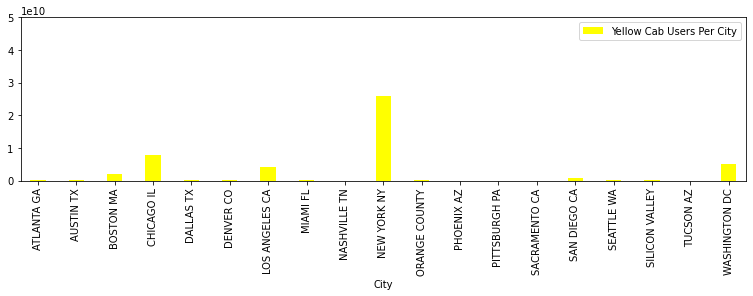

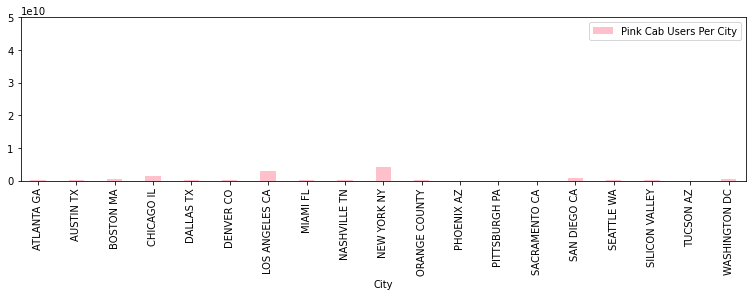

In [33]:
YCUsersPerCity.plot.bar(figsize = (13, 3), width = 0.4, color= 'yellow')
plt.ylim([0 , 50000000000])
PCUsersPerCity.plot.bar(figsize = (13, 3), width = 0.4, color='pink')
plt.ylim([0 , 50000000000])

According to the data, Yellow Cab dominates more cities than the Pink Cab

##### Costs of the trip per KM travelled for each company

In [34]:
YCcostbyKM = YellowCabDF.groupby(['Company', 'KM Travelled' ]).agg(({'Cost of Trip':'mean'}))
YCcostbyKM

Cost of Trip
Company    KM Travelled              
Yellow Cab 2                       25
           2                       25
           2                       26
           2                       26
           2                       26
...                               ...
           46                     613
           47                     619
           47                     624
           48                     629
           48                     636

[874 rows x 1 columns]

In [35]:
PCcostbyKM = PinkCabDF.groupby([ 'Company', 'KM Travelled' ]).agg(({'Cost of Trip':'mean'}))
PCcostbyKM

Cost of Trip
Company  KM Travelled              
Pink Cab 2                       21
         2                       21
         2                       21
         2                       22
         2                       21
...                             ...
         46                     515
         47                     511
         47                     520
         48                     529
         48                     528

[874 rows x 1 columns]

The data shows that the Pink Cab company costs less.

but what about the profit?

In [36]:
YCProfitPerCity = YellowCabDF.groupby('City').Profit.sum().to_frame('Profit for Yellow Cab Per City')
YCProfitPerCity

,Profit for Yellow Cab Per City
City,
ATLANTA GA,"746,383"
AUSTIN TX,"379,256"
BOSTON MA,"1,506,718"
CHICAGO IL,"3,068,591"
DALLAS TX,"1,104,003"
DENVER CO,"357,000"
LOS ANGELES CA,"3,285,977"
MIAMI FL,"596,000"
NASHVILLE TN,"85,248"


In [37]:
PCProfitPerCity = PinkCabDF.groupby('City').Profit.sum().to_frame('Profit for Pink Cab Per City')
PCProfitPerCity

,Profit for Pink Cab Per City
City,
ATLANTA GA,"96,050"
AUSTIN TX,"147,445"
BOSTON MA,"262,002"
CHICAGO IL,"318,722"
DALLAS TX,"24,730"
DENVER CO,"40,585"
LOS ANGELES CA,"1,125,732"
MIAMI FL,"162,301"
NASHVILLE TN,"64,285"


(0.0, 30000000.0)

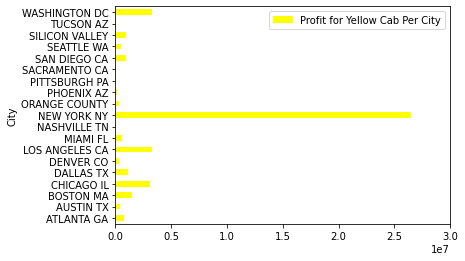

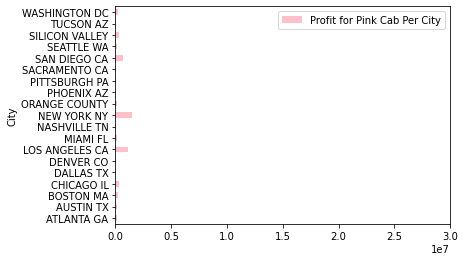

In [38]:
YCProfitPerCity.plot.barh(color= 'yellow')
plt.xlim([0 , 30000000])
PCProfitPerCity.plot.barh(color= 'pink')
plt.xlim([0 , 30000000])

The Yellow Cab is earing more profit than the Pink Cab.

##### How much percentage users spend on the cabs compared to their income 

In [39]:
# For the yellow cab
YCPercentageOfIncome = YellowCabDF.groupby([ 'Company', 'Customer ID','Income (USD/Month)' ]).agg(({'Price Charged':'mean'}))
YCPercentageOfIncome

Price Charged
Company    Customer ID Income (USD/Month)               
Yellow Cab 1           16359                         608
           2           12069                         622
           3           12968                         549
           4           13803                         630
           5           9965                          741
...                                                  ...
           59996       16634                         201
           59997       22352                         390
           59998       5678                          377
           59999       24577                         292
           60000       20303                         338

[39896 rows x 1 columns]

In [40]:
YCpercent = (YellowCabDF['Income (USD/Month)'] / YellowCabDF['Price Charged'].sum()) * 100
pd.set_option('float_format', '{:,.4f}'.format)
YCpercent

6        0.0068
7        0.0031
8        0.0107
9        0.0226
10       0.0141
          ...  
359387   0.0124
359388   0.0052
359389   0.0063
359390   0.0051
359391   0.0090
Name: Income (USD/Month), Length: 274681, dtype: float64

In [41]:
# For the pink cab
PCPercentageOfIncome = PinkCabDF.groupby([ 'Company', 'Customer ID','Income (USD/Month)' ]).agg(({'Price Charged':'mean'}))
PCPercentageOfIncome

Price Charged
Company  Customer ID Income (USD/Month)               
Pink Cab 1           16359                    571.6200
         2           12069                    398.6775
         3           12968                    475.7700
         4           13803                    562.6400
         5           9965                     284.0875
...                                                ...
         59995       21184                     95.1550
         59997       22352                    483.6750
         59998       5678                     467.3900
         59999       24577                    305.5050
         60000       20303                    459.1875

[32330 rows x 1 columns]

In [42]:
PCpercent = (PinkCabDF['Income (USD/Month)'] / PinkCabDF['Price Charged'].sum()) * 100
pd.set_option('float_format', '{:,.4f}'.format)
PCpercent

0        0.0411
1        0.0351
2        0.0427
3        0.0886
4        0.0324
          ...  
359159   0.0119
359160   0.0747
359161   0.0865
359162   0.0470
359163   0.0490
Name: Income (USD/Month), Length: 84711, dtype: float64

In [43]:
print('The average for the Yellow Cab:', YCpercent.mean() )
print('The average for the Pink Cab:', PCpercent.mean() )

The average for the Yellow Cab: 0.01195487096419384
The average for the Pink Cab: 0.057197293310462055


###### Genders of the Users per Company

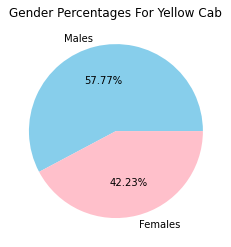

In [44]:
YCGenderPrecentage= YellowCabDF['Gender'].value_counts(normalize=True) * 100
plt.pie(YCGenderPrecentage, labels= ['Males', 'Females'], colors= ['skyblue', 'pink'], autopct='%.2f%%')
plt.title('Gender Percentages For Yellow Cab')
plt.show()

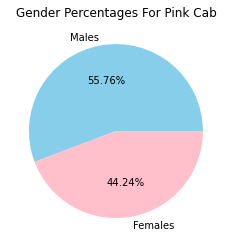

In [45]:
PCGenderPrecentage= PinkCabDF['Gender'].value_counts(normalize=True) * 100
plt.pie(PCGenderPrecentage, labels= ['Males', 'Females'], colors= ['skyblue', 'pink'], autopct='%.2f%%')
plt.title('Gender Percentages For Pink Cab')
plt.show()

According to the data, more women use the Pink Cab 

###### Payment Methods of the Users per Company

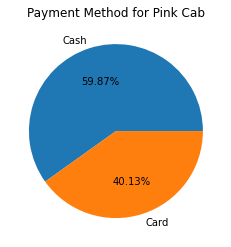

In [46]:
PCPaymentMode= PinkCabDF['Payment_Mode'].value_counts(normalize=True) * 100
plt.pie(PCPaymentMode, labels=['Cash', 'Card'] ,autopct='%.2f%%')
plt.title('Payment Method for Pink Cab')
plt.show()

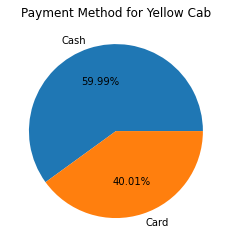

In [47]:
YCPaymentMode= YellowCabDF['Payment_Mode'].value_counts(normalize=True) * 100
plt.pie(YCPaymentMode, labels=['Cash', 'Card'] ,autopct='%.2f%%')
plt.title('Payment Method for Yellow Cab')
plt.show()

## Hypothesis & Finding The p-value

###### the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.
###### If there is less than a 5% chance of a result as extreme as the sample result if the null hypothesis were true, then the null hypothesis is rejected. When this happens, the result is said to be statistically significant .

1.	Profits for both companies annually and monthly 
2.	Which company has more demand per city? 
3.	What is the profit per city for each company? 
4.	What is the cost of the trip per KM for each company? 
5.	Gender percentages for each company
6.	Payment method percentages for each company


In [48]:
PValueSample = int((10/100)*len(Data))

 ###### p-value for KM Travelled

In [49]:
avgKM= np.mean(Data['KM Travelled'])
avgKM

22.567254084676

In [52]:
KMTravel = np.random.choice(Data["KM Travelled"], PValueSample)
test, pvalue = ttest_1samp(KMTravel, avgKM) # the mean 
print("p-values:", pvalue)
if pvalue < 0.05:  
    print("The null hypothesis is rejected")
else:
    print("the null hypothesis is accepted")

p-values: 0.6642866402541929
the null hypothesis is accepted


###### p-value for profits

In [53]:
avgProfit= np.mean(Data['Profit'])
avgProfit

137.25319843458038

In [55]:
profit = np.random.choice(Data["Profit"], PValueSample)
test, pvalue = ttest_1samp(profit, avgProfit) 
print("p-values:", pvalue)
if pvalue < 0.05:  
    print("The null hypothesis is rejected")
else:
    print("the null hypothesis is accepted")

p-values: 0.7945724619181601
the null hypothesis is accepted


######  p-value for Cost of the trips

In [56]:
avgCost= np.mean(Data['Cost of Trip'])
avgCost

286.1901128244225

In [57]:
costOfTrip = np.random.choice(Data["Cost of Trip"], PValueSample)
test, pvalue = ttest_1samp(costOfTrip, avgCost) # the mean 
print("p-values:", pvalue)
if pvalue < 0.05:  
    print("The null hypothesis is rejected")
else:
    print("the null hypothesis is accepted")

p-values: 0.0393315738712342
The null hypothesis is rejected


###### p-value for ages

In [58]:
avgAge= np.mean(Data['Age'])
avgAge

35.33670476805271

In [59]:
age = np.random.choice(Data["Age"],PValueSample)
test, pval = ttest_1samp(age, avgAge)
print("p-values",pval)
if pval < 0.05:
    print("The null hypothesis is rejected")
else:
    print("the null hypothesis is accepted")

p-values 0.9733001084810236
the null hypothesis is accepted


# Results

1. The Yellow Cab profited approximately 8 times more than the Pink Cab from 2016-2018, with a noticeable increase during the holidays
2. Yellow Cab dominates more cities than the Pink Cab. However, Pink Cab is cheaper for the user
3.  The Yellow Cab is earning more profit than the Pink Cab in cities such as New York and Los Angeles
4.  Women are more likely to be the customers of the Pink Cab.
5. The majority of users preferred to use card as a payment method in both companies


# Conclusion

### Due to the strong evidence and data, we highly recommend the Yellow Cab company to invest in.